# Template 

- Author: Israel Oliveira [\[e-mail\]](mailto:'Israel%20Oliveira%20'<prof.israel@gmail.com>)

In [1]:
!pip3 install -U random-forest-mc

In [1]:
%load_ext watermark

In [2]:
from random_forest_mc.model import RandomForestMC
from random_forest_mc.utils import load_file_json
from collections import Counter, defaultdict
import pandas as pd
import numpy as np
from itertools import combinations

In [17]:
from tqdm import tqdm

# from glob import glob

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 12, 8 # 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.grid'] = True
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5

import seaborn as sns
sns.set_theme()

# pd.set_option("max_columns", None)
# pd.set_option("max_rows", None)
# pd.set_option('display.max_colwidth', None)

from IPython.display import Markdown, display
def md(arg):
    display(Markdown(arg))

# from pandas_profiling import ProfileReport
# #report = ProfileReport(#DataFrame here#, minimal=True)
# #report.to

# import pyarrow.parquet as pq
# #df = pq.ParquetDataset(path_to_folder_with_parquets, filesystem=None).read_pandas().to_pandas()

# import json
# def open_file_json(path,mode='r',var=None):
#     if mode == 'w':
#         with open(path,'w') as f:
#             json.dump(var, f)
#     if mode == 'r':
#         with open(path,'r') as f:
#             return json.load(f)

# import functools
# import operator
# def flat(a):
#     return functools.reduce(operator.iconcat, a, [])

# import json
# from glob import glob
# from typing import NewType


# DictsPathType = NewType("DictsPath", str)


# def open_file_json(path):
#     with open(path, "r") as f:
#         return json.load(f)

# class LoadDicts:
#     def __init__(self, dict_path: DictsPathType = "./data"):
#         Dicts_glob = glob(f"{dict_path}/*.json")
#         self.List = []
#         self.Dict = {}
#         for path_json in Dicts_glob:
#             name = path_json.split("/")[-1].replace(".json", "")
#             self.List.append(name)
#             self.Dict[name] = open_file_json(path_json)
#             setattr(self, name, self.Dict[name])


In [4]:
# Run this cell before close.
%watermark -d --iversion -b -r -g -m -v
!cat /proc/cpuinfo |grep 'model name'|head -n 1 |sed -e 's/model\ name/CPU/'
!free -h |cut -d'i' -f1  |grep -v total

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.27.0

Compiler    : GCC 10.2.1 20210110
OS          : Linux
Release     : 5.11.0-7633-generic
Machine     : x86_64
Processor   : 
CPU cores   : 4
Architecture: 64bit

Git hash: 09ea49c1e5242e697e4c1f6c9b4e7e744c84a5c0

Git repo: https://github.com/ysraell/random-forest-mc.git

Git branch: main

matplotlib: 3.4.3
seaborn   : 0.11.2
pandas    : 1.3.2
numpy     : 1.20.3

CPU	: Intel(R) Core(TM) i7-7500U CPU @ 2.70GHz
Mem:            15G
Swap:          4.0G


In [5]:
modeldict = load_file_json('/work/data/cls_rfmc_v033.json')
modeldict.keys()

dict_keys(['batch_train_pclass', 'batch_val_pclass', '_N', 'min_feature', 'max_feature', 'th_start', 'delta_th', 'max_discard_trees', 'n_trees', 'class_vals', 'Forest', 'survived_scores', 'version', 'numeric_cols', 'feature_cols', 'type_of_cols', 'target_col'])

In [6]:
cls = RandomForestMC()
cls.dict2model(modeldict)

In [7]:
len(cls.Forest)

160

In [8]:
cls.target_col = 'Class'

In [21]:
df = pd.read_csv('/work/data/creditcard_trans_int.csv')
target_col = 'Class'
ds_cols = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
df = df[ds_cols+[target_col]].dropna()
df[target_col] = df[target_col].astype(str)
df_fraud = df.query('Class == "1"').reset_index(drop=True).copy()
df_truth = df.query('Class == "0"').reset_index(drop=True).copy()
df_train = pd.concat([df_fraud, df_truth.sample(n=500)]).reset_index(drop=True)
cls.process_dataset(df_train)

In [10]:
stats,_ = cls.featCount()
stats

(6.9, 2.495495942693556, 2, 9)

In [11]:
sorted(cls.featImportance().items(), key=lambda x:x[1], reverse=True)

[('V14', 0.8625),
 ('V4', 0.53125),
 ('V17', 0.3875),
 ('V11', 0.3375),
 ('V10', 0.31875),
 ('V3', 0.2875),
 ('V12', 0.2875),
 ('V5', 0.25),
 ('V2', 0.24375),
 ('V7', 0.2375),
 ('Amount', 0.23125),
 ('V19', 0.2125),
 ('V16', 0.20625),
 ('V15', 0.2),
 ('V21', 0.2),
 ('V18', 0.18125),
 ('V20', 0.18125),
 ('V25', 0.18125),
 ('V13', 0.16875),
 ('V1', 0.1625),
 ('V6', 0.1625),
 ('V9', 0.15625),
 ('V27', 0.15625),
 ('V23', 0.15),
 ('V24', 0.14375),
 ('V8', 0.1375),
 ('V22', 0.125),
 ('V26', 0.1125),
 ('V28', 0.0875)]

In [12]:
sorted(cls.featScoreMean().items(), key=lambda x:x[1], reverse=True)

[('V25', 0.9215871516296645),
 ('V3', 0.921530673019655),
 ('V4', 0.9214746172441579),
 ('V21', 0.9214469178082192),
 ('V8', 0.9212328767123285),
 ('V22', 0.920890410958904),
 ('V5', 0.9206335616438356),
 ('V27', 0.9205479452054796),
 ('V12', 0.9203394877903518),
 ('V16', 0.9200913242009132),
 ('V14', 0.919719078816756),
 ('V10', 0.9195541230190708),
 ('V15', 0.9191994863013698),
 ('V2', 0.9191253951527927),
 ('V19', 0.9191176470588235),
 ('V13', 0.9190766108574328),
 ('V11', 0.9185058346017253),
 ('V28', 0.9182974559686891),
 ('V24', 0.9182549136390705),
 ('V17', 0.9181948740609812),
 ('V18', 0.9181624940954178),
 ('V9', 0.9180821917808218),
 ('V20', 0.9180444024563058),
 ('V1', 0.9178082191780821),
 ('V6', 0.917281348788198),
 ('V7', 0.9161860129776498),
 ('V26', 0.9159056316590564),
 ('Amount', 0.9153091447611996),
 ('V23', 0.9148116438356165)]

In [13]:
pimp = cls.featPairImportance()
sorted(pimp.items(), key=lambda x:x[1], reverse=True)

Counting pair occurences: 100%|██████████| 160/160 [00:16<00:00,  9.86it/s]


[(('V4', 'V14'), 0.40624999999999956),
 (('V14', 'V17'), 0.29999999999999993),
 (('V11', 'V14'), 0.2875),
 (('V10', 'V14'), 0.26250000000000007),
 (('V12', 'V14'), 0.2500000000000001),
 (('V3', 'V14'), 0.24375000000000013),
 (('V5', 'V14'), 0.23125000000000012),
 (('V2', 'V14'), 0.22500000000000012),
 (('V14', 'Amount'), 0.2187500000000001),
 (('V4', 'V17'), 0.2125000000000001),
 (('V7', 'V14'), 0.2000000000000001),
 (('V14', 'V19'), 0.1937500000000001),
 (('V14', 'V15'), 0.18125000000000008),
 (('V14', 'V21'), 0.18125000000000008),
 (('V4', 'V12'), 0.17500000000000007),
 (('V14', 'V16'), 0.17500000000000007),
 (('V4', 'V11'), 0.16875000000000007),
 (('V14', 'V25'), 0.16875000000000007),
 (('V14', 'V18'), 0.16250000000000006),
 (('V14', 'V20'), 0.15625000000000006),
 (('V3', 'V4'), 0.15000000000000005),
 (('V4', 'V10'), 0.15000000000000005),
 (('V6', 'V14'), 0.15000000000000005),
 (('V13', 'V14'), 0.15000000000000005),
 (('V1', 'V14'), 0.14375000000000004),
 (('V9', 'V14'), 0.143750000

In [14]:
corr = cls.featCorrDataFrame()
corr

Counting pair occurences: 100%|██████████| 160/160 [00:16<00:00,  9.96it/s]


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
V1,0.162476,0.068726,0.068726,0.087524,0.024994,0.018753,0.037506,0.031250,0.012497,0.068726,...,0.012497,0.037506,0.012497,0.031250,0.024994,0.018753,0.031250,0.018753,0.012497,0.068726
V2,0.068726,0.243774,0.062500,0.099976,0.043762,0.049988,0.056244,0.006248,0.043762,0.075012,...,0.043762,0.087524,0.043762,0.031250,0.031250,0.062500,0.024994,0.068726,0.024994,0.068726
V3,0.068726,0.062500,0.287598,0.150024,0.087524,0.031250,0.043762,0.043762,0.037506,0.075012,...,0.068726,0.049988,0.024994,0.056244,0.049988,0.037506,0.037506,0.043762,0.049988,0.049988
V4,0.087524,0.099976,0.150024,0.531250,0.099976,0.062500,0.131226,0.093750,0.056244,0.150024,...,0.093750,0.118774,0.056244,0.087524,0.062500,0.081238,0.049988,0.099976,0.043762,0.112488
V5,0.024994,0.043762,0.087524,0.099976,0.250000,0.031250,0.062500,0.049988,0.049988,0.093750,...,0.056244,0.068726,0.043762,0.062500,0.049988,0.049988,0.018753,0.043762,0.031250,0.049988
V6,0.018753,0.049988,0.031250,0.062500,0.031250,0.162476,0.043762,0.018753,0.043762,0.043762,...,0.024994,0.024994,0.031250,0.024994,0.024994,0.049988,0.018753,0.018753,0.012497,0.031250
V7,0.037506,0.056244,0.043762,0.131226,0.062500,0.043762,0.237549,0.037506,0.024994,0.062500,...,0.056244,0.043762,0.037506,0.037506,0.037506,0.037506,0.024994,0.024994,0.012497,0.049988
V8,0.031250,0.006248,0.043762,0.093750,0.049988,0.018753,0.037506,0.137451,0.031250,0.049988,...,0.018753,0.031250,0.018753,0.031250,0.024994,0.037506,0.012497,0.024994,0.012497,0.049988
V9,0.012497,0.043762,0.037506,0.056244,0.049988,0.043762,0.024994,0.031250,0.156250,0.062500,...,0.049988,0.037506,0.031250,0.031250,0.018753,0.043762,0.024994,0.037506,0.018753,0.031250
V10,0.068726,0.075012,0.075012,0.150024,0.093750,0.043762,0.062500,0.049988,0.062500,0.318848,...,0.075012,0.024994,0.043762,0.049988,0.043762,0.081238,0.031250,0.037506,0.006248,0.068726


<AxesSubplot:>

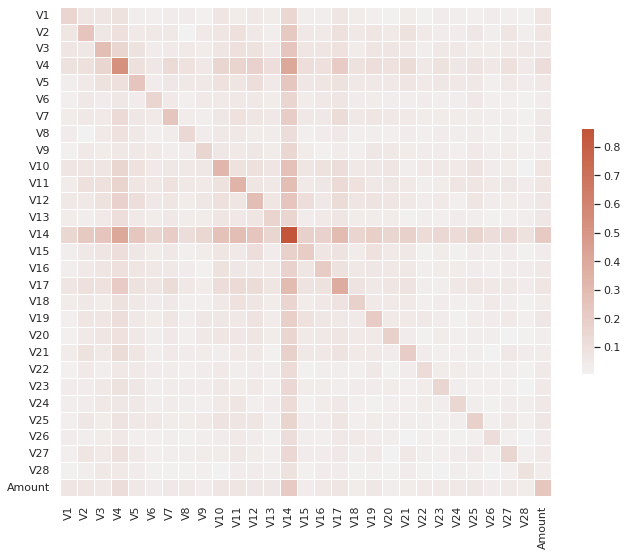

In [15]:
sns.set_theme(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=corr.max().max(), center=0,
            linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

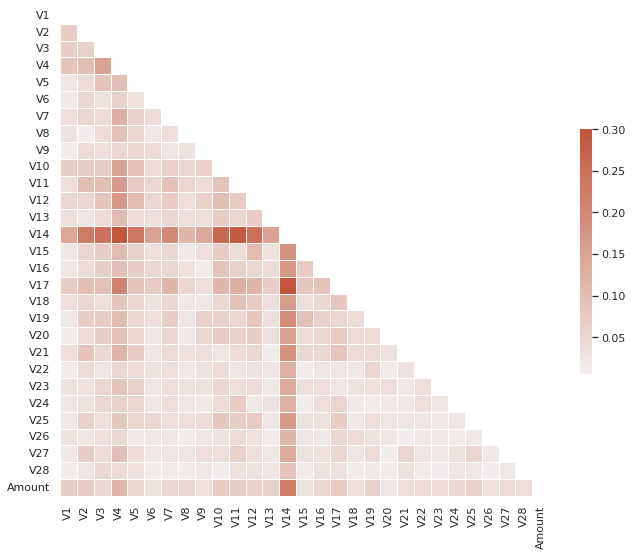

In [16]:
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Using sample based feat. importance.

In [22]:
row_fraud = df_fraud.sample().reset_index(drop=True).loc[0]
row_truth = df_truth.sample().reset_index(drop=True).loc[0]
rows = [row_fraud, row_truth]
display(rows)

[V1         562777321
 V2         728572751
 V3         474308876
 V4         522550896
 V5        1145539148
 V6         256557827
 V7         449308292
 V8         730072421
 V9        1364256028
 V10        229746442
 V11        399732306
 V12       1918514989
 V13        690989554
 V14       1739794135
 V15        381766214
 V16       1423580098
 V17       2587939069
 V18        970403055
 V19        716220534
 V20        548971676
 V21        347977389
 V22       1068661727
 V23        452918431
 V24        319626351
 V25        985942463
 V26        235607025
 V27        225872063
 V28        155392759
 Amount        187.11
 Class              1
 Name: 0, dtype: object,
 V1         555664519
 V2         726827329
 V3         495161108
 V4         318755840
 V5        1127846645
 V6         262569917
 V7         428712295
 V8         737089415
 V9        1074000662
 V10        253254568
 V11        528219113
 V12       1830847614
 V13        628948599
 V14       1907536488
 V15   

'1'

In [24]:
for row in rows:
    stats,_ = cls.sampleClassFeatCount(row,row.Class)
    display({row.Class: stats})

{'1': (6.9, 2.495495942693556, 2, 9)}

{'0': (6.8355263157894735, 2.50379732382259, 2, 9)}

In [31]:
for func in ['sampleClassFeatImportance','sampleClassFeatScoreMean','sampleClassFeatPairImportance']:
    md(f'## {func}')
    for row in rows:
        out = getattr(cls, func)(row,row.Class)
        display({row.Class: sorted(out.items(),key=lambda x:x[1], reverse=True)[:5]})

## sampleClassFeatImportance

{'1': [('V14', 0.8625),
  ('V4', 0.53125),
  ('V17', 0.3875),
  ('V11', 0.3375),
  ('V10', 0.31875)]}

{'0': [('V14', 0.868421052631579),
  ('V4', 0.5394736842105263),
  ('V17', 0.375),
  ('V11', 0.3223684210526316),
  ('V10', 0.3157894736842105)]}

## sampleClassFeatScoreMean

{'1': [('V25', 0.9215871516296645),
  ('V3', 0.921530673019655),
  ('V4', 0.9214746172441579),
  ('V21', 0.9214469178082192),
  ('V8', 0.9212328767123285)]}

{'0': [('V1', 0.9240867579908675),
  ('V27', 0.9230196545562832),
  ('V28', 0.9224559686888456),
  ('V3', 0.9221089518955083),
  ('V24', 0.9218851924331375)]}

## sampleClassFeatPairImportance

{'1': [(('V4', 'V14'), 0.40624999999999956),
  (('V14', 'V17'), 0.29999999999999993),
  (('V11', 'V14'), 0.2875),
  (('V10', 'V14'), 0.26250000000000007),
  (('V12', 'V14'), 0.2500000000000001)]}

{'0': [(('V4', 'V14'), 0.40624999999999956),
  (('V14', 'V17'), 0.29999999999999993),
  (('V11', 'V14'), 0.2875),
  (('V10', 'V14'), 0.26250000000000007),
  (('V12', 'V14'), 0.2500000000000001)]}

Counting pair occurences: 100%|██████████| 152/152 [00:17<00:00,  8.47it/s]


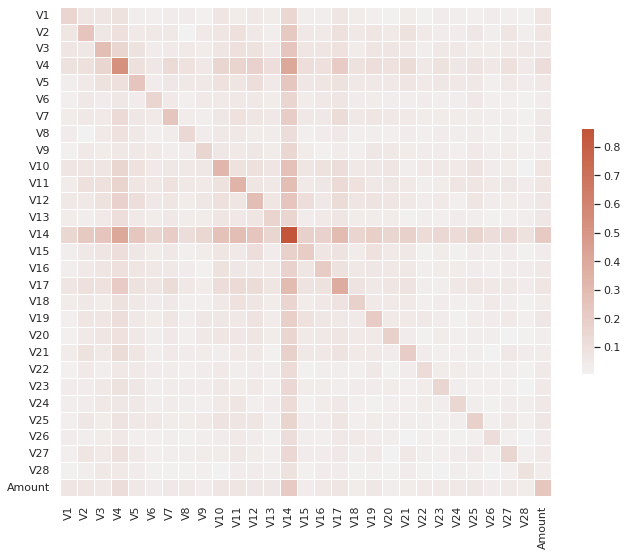

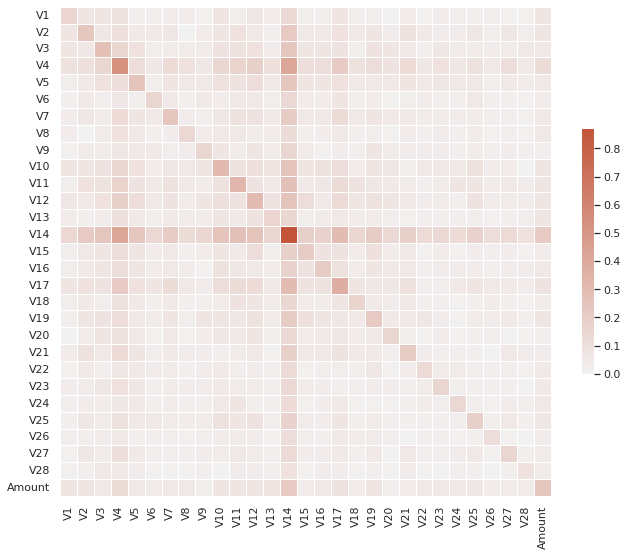

In [32]:
for row in rows:
    corr = cls.sampleClassFeatCorrDataFrame(row,row.Class)
    sns.set_theme(style="white")

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, cmap=cmap, vmax=corr.max().max(), center=0,
                linewidths=.5, cbar_kws={"shrink": .5})

# Draft 2

In [49]:
row = df_train.sample().reset_index(drop=True).loc[0]
Tree = cls.Forest[0]
Class = cls.maxProbClas(cls.useForest(row))

def treeFeats(Tree):
    return [feat for feat in cls.feature_cols if f"'{feat}'" in str(Tree)]

cls.treeFeats = treeFeats

Forest = [Tree for Tree in cls.Forest if cls.maxProbClas(cls.useTree(Tree, row)) == Class]

In [51]:
len(cls.Forest)

160

# Draft 1

In [30]:
out = [len([feat for feat in cls.feature_cols if f"'{feat}'" in str(Tree)]) for Tree in cls.Forest]
(np.mean(out), np.std(out), min(out), max(out)), out

((9.0234375, 0.15128841196122722, 9, 10),
 [9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  10,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  10,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  10,
  9,
  9])

In [11]:
"\'V1\'" in str(cls.Forest[0])

True

In [12]:
feat_counts = {feat: sum([f"'{feat}'" in str(Tree) for Tree in cls.Forest])/len(cls.Forest) for feat in cls.feature_cols}
sorted(feat_counts.items(), key=lambda x: x[1], reverse=True)

[('V14', 0.8046875),
 ('V4', 0.75),
 ('V16', 0.4375),
 ('V12', 0.4296875),
 ('V3', 0.3984375),
 ('V10', 0.3984375),
 ('V17', 0.375),
 ('V5', 0.34375),
 ('V11', 0.34375),
 ('Amount', 0.328125),
 ('V1', 0.3203125),
 ('V2', 0.3046875),
 ('V7', 0.2890625),
 ('V19', 0.2890625),
 ('V8', 0.28125),
 ('V18', 0.28125),
 ('V15', 0.2578125),
 ('V21', 0.2578125),
 ('V24', 0.234375),
 ('V9', 0.2265625),
 ('V23', 0.2265625),
 ('V28', 0.2265625),
 ('V20', 0.203125),
 ('V22', 0.203125),
 ('V6', 0.1953125),
 ('V13', 0.1796875),
 ('V26', 0.1640625),
 ('V27', 0.1484375),
 ('V25', 0.125)]

In [129]:
sum_scores = sum(cls.survived_scores)
feat_counts = {feat: np.mean(list(filter(lambda num: num != 0,[(f"'{feat}'" in str(Tree))*score for Tree,score in zip(cls.Forest,cls.survived_scores)]))) for feat in cls.feature_cols}
sorted(feat_counts.items(), key=lambda x: x[1], reverse=True)

[('V22', 0.9237355110642783),
 ('V8', 0.9237062404870624),
 ('V20', 0.9234720758693361),
 ('V21', 0.9232046492320464),
 ('V28', 0.9222957014643363),
 ('V16', 0.922272504892368),
 ('V5', 0.9220890410958907),
 ('V11', 0.9220890410958907),
 ('V4', 0.9220890410958905),
 ('V3', 0.9219715283373626),
 ('V19', 0.9217882265827473),
 ('V25', 0.9214469178082192),
 ('V14', 0.9211663785077804),
 ('V13', 0.9209350804050026),
 ('Amount', 0.9208251793868234),
 ('V7', 0.9207700851536469),
 ('V18', 0.9207572298325724),
 ('V10', 0.9206956755304861),
 ('V1', 0.9206481790845308),
 ('V6', 0.9205479452054794),
 ('V12', 0.9203611457036116),
 ('V17', 0.9202340182648401),
 ('V9', 0.919933868682097),
 ('V27', 0.9197909156452774),
 ('V15', 0.9197799916977998),
 ('V2', 0.9193010186160874),
 ('V26', 0.9192759295499021),
 ('V23', 0.9188710439300894),
 ('V24', 0.9187214611872143)]

In [26]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(df[ds_cols], df[target_col])

RandomForestClassifier()

In [35]:
feat_counts_baseline = {feat: score for feat,score in zip(ds_cols, forest.feature_importances_)}

In [36]:
sorted(feat_counts_baseline.items(), key=lambda x: x[1], reverse=True)

[('V12', 0.145750137242988),
 ('V17', 0.13073994696652233),
 ('V14', 0.10869943505722834),
 ('V10', 0.10659552465814812),
 ('V11', 0.07494282109076995),
 ('V16', 0.07007434988401999),
 ('V9', 0.03723455894197347),
 ('V18', 0.031377649659517226),
 ('V7', 0.02974542566681773),
 ('V4', 0.02442541464406295),
 ('V26', 0.020258285882117703),
 ('V21', 0.01801605889498627),
 ('V1', 0.01675503823468746),
 ('V6', 0.016007484083145247),
 ('V3', 0.014916958829971082),
 ('V20', 0.01349498078472359),
 ('V27', 0.012218137804112314),
 ('V8', 0.011852712616607844),
 ('V19', 0.011730061830087143),
 ('V5', 0.011602808187383826),
 ('Amount', 0.01133494532179039),
 ('V2', 0.011281574126221659),
 ('V28', 0.011259359502862502),
 ('V13', 0.01094957985420983),
 ('V22', 0.010747722550576653),
 ('V25', 0.010685071237540667),
 ('V15', 0.010582035128143272),
 ('V24', 0.009877699910013103),
 ('V23', 0.006844221408771363)]

In [66]:
ForestFake = [str(cls.sampleFeats()) for _ in range(1024*10)]
feat_counts = {feat: sum([f"'{feat}'" in str(Tree) for Tree in ForestFake])/len(ForestFake) for feat in cls.feature_cols}
sorted(feat_counts.items(), key=lambda x: x[1], reverse=True)

[('V21', 0.75126953125),
 ('V27', 0.7501953125),
 ('V19', 0.74736328125),
 ('V25', 0.74482421875),
 ('V17', 0.74462890625),
 ('V3', 0.7443359375),
 ('V18', 0.744140625),
 ('V22', 0.74404296875),
 ('V26', 0.7439453125),
 ('V6', 0.74375),
 ('V8', 0.74365234375),
 ('V4', 0.743359375),
 ('V23', 0.74326171875),
 ('V24', 0.74296875),
 ('V16', 0.74287109375),
 ('V13', 0.7427734375),
 ('V7', 0.74267578125),
 ('V1', 0.7423828125),
 ('V20', 0.7419921875),
 ('V11', 0.74189453125),
 ('V9', 0.7412109375),
 ('Amount', 0.7404296875),
 ('V12', 0.74033203125),
 ('V15', 0.73994140625),
 ('V10', 0.73876953125),
 ('V14', 0.737890625),
 ('V2', 0.73740234375),
 ('V28', 0.73662109375),
 ('V5', 0.7361328125)]

In [14]:
cls.featScoreMean()

{'V1': 0.9206481790845308,
 'V2': 0.9193010186160874,
 'V3': 0.9219715283373626,
 'V4': 0.9220890410958905,
 'V5': 0.9220890410958907,
 'V6': 0.9205479452054794,
 'V7': 0.9207700851536469,
 'V8': 0.9237062404870624,
 'V9': 0.919933868682097,
 'V10': 0.9206956755304861,
 'V11': 0.9220890410958907,
 'V12': 0.9203611457036116,
 'V13': 0.9209350804050026,
 'V14': 0.9211663785077804,
 'V15': 0.9197799916977998,
 'V16': 0.922272504892368,
 'V17': 0.9202340182648401,
 'V18': 0.9207572298325724,
 'V19': 0.9217882265827473,
 'V20': 0.9234720758693361,
 'V21': 0.9232046492320464,
 'V22': 0.9237355110642783,
 'V23': 0.9188710439300894,
 'V24': 0.9187214611872143,
 'V25': 0.9214469178082192,
 'V26': 0.9192759295499021,
 'V27': 0.9197909156452774,
 'V28': 0.9222957014643363,
 'Amount': 0.9208251793868234}

In [16]:
Tree = cls.Forest[0]
[feat for feat in cls.feature_cols if f"'{feat}'" in str(Tree)]

['V1', 'V3', 'V4', 'V10', 'V14', 'V16', 'V17', 'V20', 'V23']

In [92]:
pair_count = defaultdict(int)
ntrees = len(cls.Forest)
for Tree in tqdm(cls.Forest):
    for pair in combinations(cls.feature_cols,2):
        pair_count[pair] += (f"'{pair[0]}'" in str(Tree) and f"'{pair[1]}'" in str(Tree))/ntrees

100%|██████████| 128/128 [00:14<00:00,  8.74it/s]


In [93]:
sorted(pair_count.items(), key=lambda x:x[1], reverse=True)

[(('V4', 'V14'), 0.5703125),
 (('V4', 'V16'), 0.359375),
 (('V3', 'V4'), 0.3203125),
 (('V10', 'V14'), 0.3203125),
 (('V14', 'V16'), 0.3203125),
 (('V4', 'V12'), 0.3125),
 (('V12', 'V14'), 0.3046875),
 (('V3', 'V14'), 0.2890625),
 (('V14', 'V17'), 0.28125),
 (('V4', 'V5'), 0.2734375),
 (('V4', 'V10'), 0.2734375),
 (('V5', 'V14'), 0.265625),
 (('V4', 'V11'), 0.2578125),
 (('V1', 'V4'), 0.25),
 (('V2', 'V14'), 0.25),
 (('V11', 'V14'), 0.25),
 (('V14', 'V15'), 0.25),
 (('V1', 'V14'), 0.2421875),
 (('V4', 'V17'), 0.2421875),
 (('V14', 'Amount'), 0.2421875),
 (('V2', 'V4'), 0.2265625),
 (('V4', 'V19'), 0.2265625),
 (('V7', 'V14'), 0.21875),
 (('V8', 'V14'), 0.21875),
 (('V14', 'V18'), 0.21875),
 (('V14', 'V21'), 0.21875),
 (('V4', 'V8'), 0.2109375),
 (('V14', 'V19'), 0.2109375),
 (('V4', 'V7'), 0.1953125),
 (('V4', 'V15'), 0.1953125),
 (('V4', 'V18'), 0.1953125),
 (('V14', 'V24'), 0.1953125),
 (('V4', 'V21'), 0.1875),
 (('V4', 'V24'), 0.1875),
 (('V4', 'Amount'), 0.1875),
 (('V12', 'V16'), 

In [96]:
N = len(cls.feature_cols)
matrix = np.zeros((N,N), dtype=np.float16)

for feat,count in feat_counts.items():
    idx = cls.feature_cols.index(feat)
    matrix[idx][idx] = count

for pair,count in pair_count.items():
    idxa = cls.feature_cols.index(pair[0])
    idxb = cls.feature_cols.index(pair[1])
    matrix[idxa][idxb], matrix[idxb][idxa] = count, count
    
corr = pd.DataFrame(matrix, index=cls.feature_cols, columns=cls.feature_cols)

<AxesSubplot:>

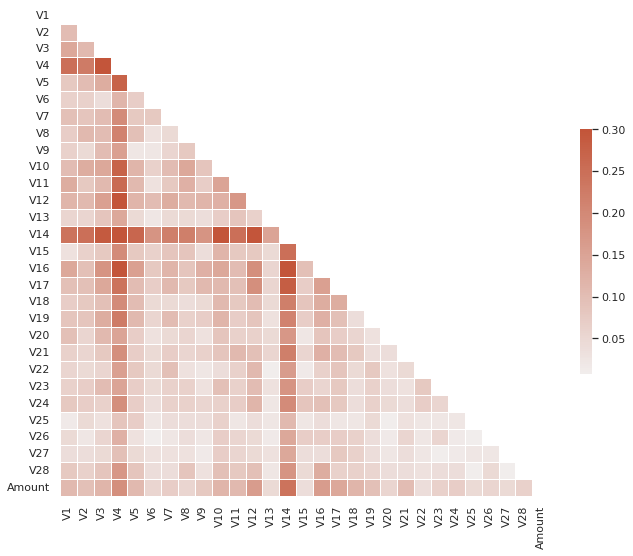

In [99]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})